In [30]:
import sympy as sy
import numpy as np
import control.matlab as cm
from mpmath import polyroots
sy.init_printing()

In [31]:
kb, k, f, m, M = sy.symbols('k_b, k, f, m, M', real=True)
W = 1/m + 1/M

In [32]:
s = sy.symbols('s', real=False)

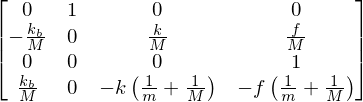

In [33]:
A = sy.Matrix([[0, 1, 0, 0], [-kb/M, 0, k/M, f/M], [0,0,0,1], [kb/M, 0, -k*W, -f*W]])
B = sy.Matrix([[0],[1/M], [0], [-W]])
Bv = sy.Matrix([[0],[1/M], [0], [-1/M]])
C = sy.Matrix([[1., 0, 0, 0]])

A


In [34]:
G = C*(s*sy.eye(4)- A).inv()*B
Gv = C*(s*sy.eye(4)- A).inv()*Bv


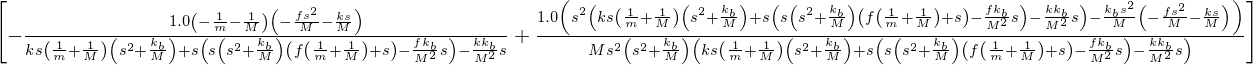

In [35]:
G

In [57]:
# Constants
Mn = 100
mn = 6
kbn = 100
kn = 3
fn = 3

Gn = G.subs([(M,Mn), (m,mn), (kb, kbn), (k, kn), (f, fn)])
Gn = sy.simplify(Gn[0])
(num, den) = sy.fraction(Gn)
numP = sy.Poly(num, s)
numcoeffs = np.asarray(numP.all_coeffs(), dtype=float)
denP = sy.Poly(den, s)
dencoeffs = np.asarray(denP.all_coeffs(), dtype=float)

Gvn = Gv.subs([(M,Mn), (m,mn), (kb, kbn), (k, kn), (f, fn)])
Gvn = sy.simplify(Gvn[0])
(numv, denv) = sy.fraction(Gvn)
numPv = sy.Poly(numv, s)
numcoeffsv = np.asarray(numPv.all_coeffs(), dtype=float)
denPv = sy.Poly(denv, s)
dencoeffsv = np.asarray(denPv.all_coeffs(), dtype=float)


In [37]:
#sy.factor(denP, extension=[sy.I])
poles = polyroots(dencoeffs)
poles

[mpc(real='-0.23408260199788464', imag='-0.66645226904530763'),
 mpc(real='-0.23408260199788464', imag='0.66645226904530763'),
 mpc(real='-0.030917398002115359', imag='1.000570798665283'),
 mpc(real='-0.030917398002115359', imag='-1.000570798665283')]

([array([  2.00051208e-06,   2.91378314e-06,   4.24420578e-06,
           6.18257464e-06,   9.00723378e-06,   1.31245695e-05,
           1.91285900e-05,   2.78889877e-05,   4.06821515e-05,
           5.93878728e-05,   8.67885090e-05,   1.27032079e-04,
           1.86366372e-04,   2.74339512e-04,   4.05842588e-04,
           6.04757638e-04,   9.10857585e-04,   1.39374376e-03,
           2.18311482e-03,   3.53951208e-03,   6.02822449e-03,
           1.09125877e-02,   2.04395076e-02,   3.62804043e-02,
           8.43341383e-02,   6.39522785e-02,   1.64827336e-02,
           7.48058440e-03,   4.07532128e-03,   2.42769344e-03,
           1.52168347e-03,   9.84019763e-04,   6.49143397e-04,
           4.33859226e-04,   2.92503692e-04,   1.98358852e-04,
           1.35048487e-04,   9.21926070e-05,   6.30520716e-05,
           4.31764912e-05,   2.95915837e-05,   2.02929212e-05,
           1.39218230e-05,   9.55361677e-06,   6.55725362e-06,
           4.50124591e-06,   3.09016980e-06,   2.121576

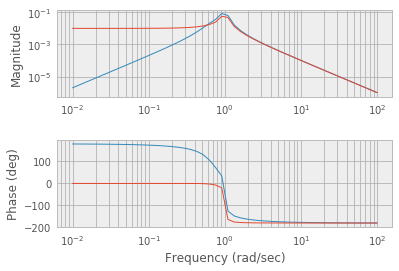

In [58]:
Gs = cm.tf(numcoeffs, dencoeffs)
Gsv = cm.tf(numcoeffsv, dencoeffsv)
cm.bode(Gs, Gsv)


In [39]:
cm.pole(Gs)

array([-0.0309174+1.0005708j , -0.0309174-1.0005708j ,
       -0.2340826+0.66645227j, -0.2340826-0.66645227j])

In [59]:
Gsv


           s^2 + 0.5 s + 0.5
--------------------------------------
100 s^4 + 53 s^3 + 153 s^2 + 50 s + 50

In [29]:
numcoeffs

array([ 1.,  0.,  0.])

In [43]:
Gs2 = cm.tf(1./100*np.array([0,0,1.]), [1, 0.5, 1.5, 0.5, 0.5])
Gs2


                 0.01
-------------------------------------
s^4 + 0.5 s^3 + 1.5 s^2 + 0.5 s + 0.5

In [44]:
cm.pole(Gs2)

array([  5.27355937e-16+1.j        ,   5.27355937e-16-1.j        ,
        -2.50000000e-01+0.66143783j,  -2.50000000e-01-0.66143783j])

In [48]:
sy.simplify(sy.expand((s**2 + 2*0.1*1*s + 1)*(s**2 + 5*s + 7)))

In [55]:
(num3, den3) = cm.zpk2tf(k=0.5, p=[-0.1+1j, -0.1-1j, -0.25 + 0.6*1j, -0.25-0.6*1j], z=[0, 0])
Gs3 = cm.tf(num3, den3)
Gs3


                   0.5 s^2
---------------------------------------------
s^4 + 0.7 s^3 + 1.533 s^2 + 0.5895 s + 0.4267

(array([[-0.24977716 -0.59987339j, -0.24977716 +0.59987339j,
         -0.10022284 -1.00029254j, -0.10022284 +1.00029254j],
        [-0.24970467 -0.59983211j, -0.24970467 +0.59983211j,
         -0.10029533 -1.00038786j, -0.10029533 +1.00038786j],
        [-0.24960864 -0.59977735j, -0.24960864 +0.59977735j,
         -0.10039136 -1.00051426j, -0.10039136 +1.00051426j],
        [-0.24948146 -0.59970469j, -0.24948146 +0.59970469j,
         -0.10051854 -1.00068188j, -0.10051854 +1.00068188j],
        [-0.24931306 -0.59960827j, -0.24931306 +0.59960827j,
         -0.10068694 -1.0009042j , -0.10068694 +1.0009042j ],
        [-0.24909019 -0.59948026j, -0.24909019 +0.59948026j,
         -0.10090981 -1.00119908j, -0.10090981 +1.00119908j],
        [-0.24879539 -0.59931025j, -0.24879539 +0.59931025j,
         -0.10120461 -1.00159028j, -0.10120461 +1.00159028j],
        [-0.24840573 -0.59908432j, -0.24840573 +0.59908432j,
         -0.10159427 -1.00210938j, -0.10159427 +1.00210938j],
        [-0.2478

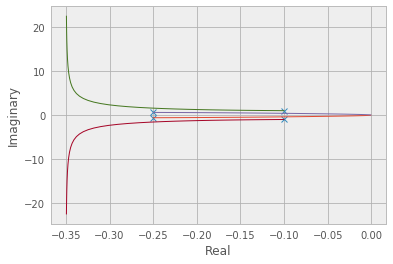

In [56]:
cm.rlocus(Gs3)

In [50]:
1+ 1J

(1+1j)